# Fitting Models Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [2]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

In [3]:
dy = 2.0
N = 30

xdata = np.linspace(-5,5,30)
ydata = c_true + b_true * xdata +a_true*xdata +  np.random.normal(0.0, dy, size=N)

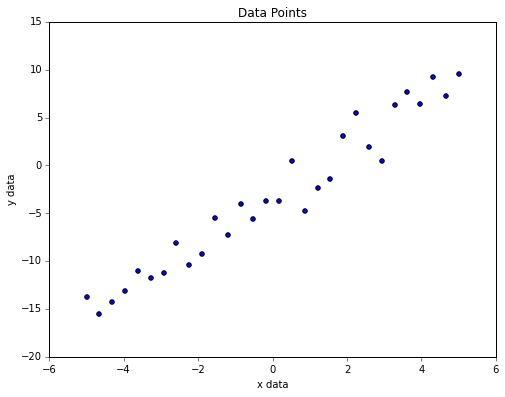

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(xdata,ydata);
plt.xlabel('x data');
plt.ylabel('y data');
plt.title('Data Points');
plt.tick_params(axis='x',top='off',direction='out');
plt.tick_params(axis='y',right='off',direction='out');

In [5]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [6]:
def quad_model(x,a,b,c):
    return a*x**2 + b*x + c

In [7]:
theta_best, theta_cov = opt.curve_fit(quad_model, xdata, ydata)

In [8]:
a = theta_best[0]
b = theta_best[1]
c = theta_best[2]

In [9]:
print('a = {0:.3f} +/- {1:.3f}'.format(a, np.sqrt(theta_cov[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(b, np.sqrt(theta_cov[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(c, np.sqrt(theta_cov[2,2])))

a = 0.041 +/- 0.040
b = 2.480 +/- 0.107
c = -3.655 +/- 0.480


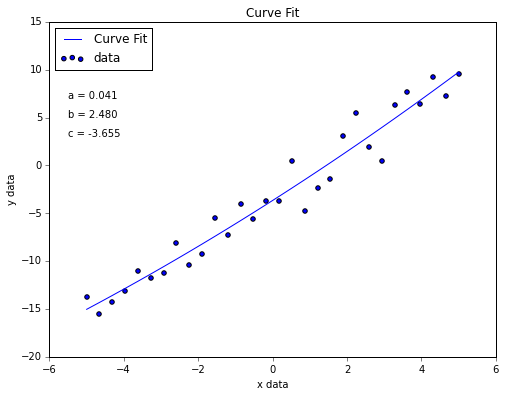

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(xdata,ydata,label = 'data');
plt.plot(xdata,quad_model(xdata,a,b,c),label = 'Curve Fit');
plt.xlabel('x data');
plt.ylabel('y data');
plt.title('Curve Fit');
plt.tick_params(axis='x',top='off',direction='out');
plt.tick_params(axis='y',right='off',direction='out');
plt.text(-5.5, 7, 'a = {0:.3f}'.format(a))
plt.text(-5.5, 5, 'b = {0:.3f}'.format(b))
plt.text(-5.5, 3, 'c = {0:.3f}'.format(c))
plt.legend(loc=2);

In [11]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors